In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [73]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
train.shape

(29451, 12)

In [74]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [75]:
train.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

  Posted_by  Count
0    Dealer  18291
1     Owner  10538
2   Builder    622


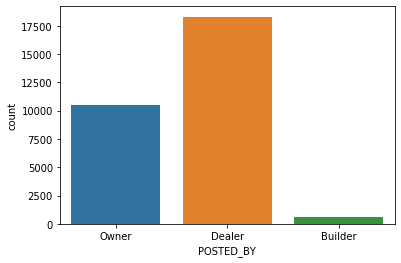

In [76]:
posted = train['POSTED_BY'].value_counts().reset_index()
posted.columns = ['Posted_by','Count']
print(posted)
sns.countplot(x = 'POSTED_BY' ,data = train)

In [77]:
train['POSTED_BY'] = train['POSTED_BY'].map({'Owner':0,'Dealer':1,'Builder':2})

In [78]:
test['POSTED_BY'] = train['POSTED_BY'].map({'Owner':0,'Dealer':1,'Builder':2})

In [79]:
print("TEST size = ",test.shape)
print('TRAIN size = ',train.shape)

TEST size =  (68720, 11)
TRAIN size =  (29451, 12)


In [80]:
train.drop(['ADDRESS','BHK_OR_RK'],axis=1,inplace=True)
test.drop(['ADDRESS','BHK_OR_RK'],axis=1,inplace=True)

In [81]:
train.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  READY_TO_MOVE  \
0          0                   0     0        2  1300.236407              1   
1          1                   0     0        2  1275.000000              1   
2          0                   0     0        2   933.159722              1   
3          0                   0     1        2   929.921143              1   
4          1                   1     0        2   999.009247              0   

   RESALE  LONGITUDE   LATITUDE  TARGET(PRICE_IN_LACS)  
0       1  12.969910  77.597960                   55.0  
1       1  12.274538  76.644605                   51.0  
2       1  12.778033  77.632191                   43.0  
3       1  28.642300  77.344500                   62.5  
4       1  22.592200  88.484911                   60.5

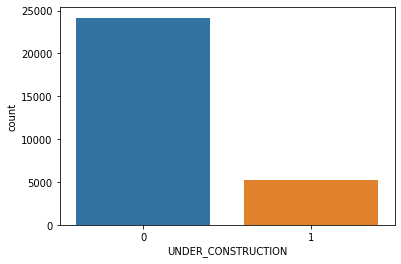

In [82]:
sns.countplot(x = 'UNDER_CONSTRUCTION' ,data = train)

In [83]:
bhk = train['BHK_OR_RK'].value_counts().reset_index()
bhk.columns = ['BHK_OR_RK','Count']
print(bhk)
sns.countplot(x = 'BHK_OR_RK' ,data = train)

KeyError: 'BHK_OR_RK'

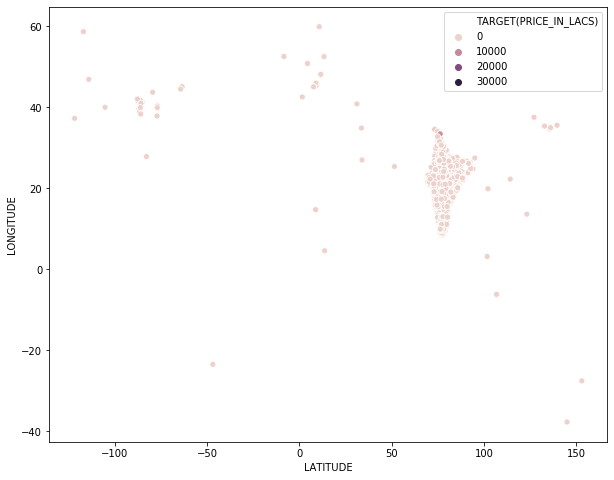

In [64]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='LATITUDE',y='LONGITUDE', hue = 'TARGET(PRICE_IN_LACS)',data=train)

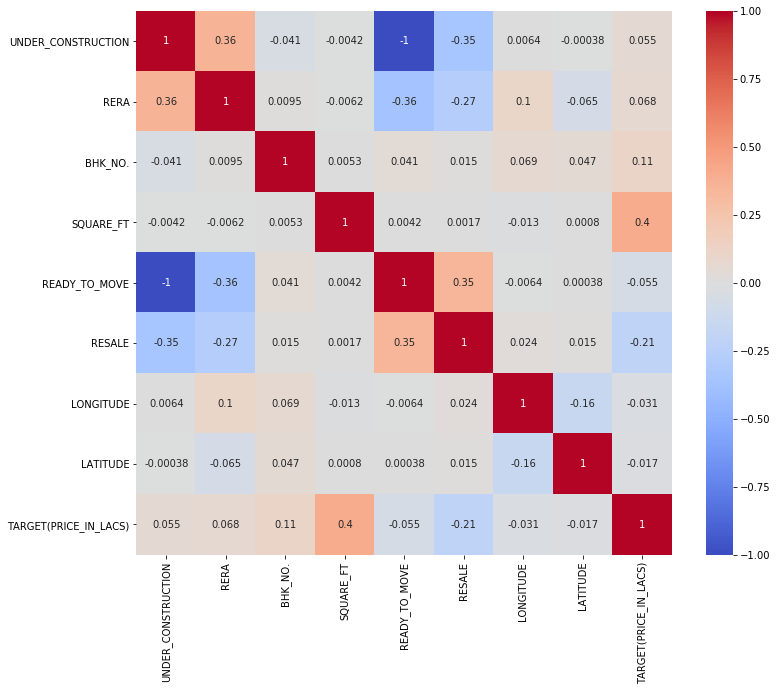

In [65]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

In [67]:
train.drop('READY_TO_MOVE',axis=1,inplace=True)
test.drop('READY_TO_MOVE',axis=1,inplace=True)

In [71]:
train.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  RESALE  \
0          0                   0     0        2  1300.236407       1   
1          1                   0     0        2  1275.000000       1   
2          0                   0     0        2   933.159722       1   
3          0                   0     1        2   929.921143       1   
4          1                   1     0        2   999.009247       1   

   LONGITUDE   LATITUDE  TARGET(PRICE_IN_LACS)  
0  12.969910  77.597960                   55.0  
1  12.274538  76.644605                   51.0  
2  12.778033  77.632191                   43.0  
3  28.642300  77.344500                   62.5  
4  22.592200  88.484911                   60.5

In [85]:
X = train.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = train['TARGET(PRICE_IN_LACS)']

In [87]:
X.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  READY_TO_MOVE  \
0          0                   0     0        2  1300.236407              1   
1          1                   0     0        2  1275.000000              1   
2          0                   0     0        2   933.159722              1   
3          0                   0     1        2   929.921143              1   
4          1                   1     0        2   999.009247              0   

   RESALE  LONGITUDE   LATITUDE  
0       1  12.969910  77.597960  
1       1  12.274538  76.644605  
2       1  12.778033  77.632191  
3       1  28.642300  77.344500  
4       1  22.592200  88.484911

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [90]:
X_train.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  \
26667          1                   1     1        3  1260.311641   
25628          1                   0     0        3  2080.732418   
22701          1                   1     1        3   842.422630   
11649          1                   0     1        3  1820.250284   
19231          1                   0     1        3  1850.828729   

       READY_TO_MOVE  RESALE  LONGITUDE   LATITUDE  
26667              0       0  18.585300  73.741300  
25628              1       1  28.567900  77.367900  
22701              0       0  19.175900  72.952200  
11649              1       1  28.522931  77.357078  
19231              1       1  28.381971  77.347688

In [91]:
X_test.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  \
2395           1                   1     1        2   574.547544   
14829          0                   0     0        2  1060.220526   
24968          0                   0     0        2  1031.207598   
25912          1                   0     0        3  1756.697409   
17594          1                   0     0        3  1650.165017   

       READY_TO_MOVE  RESALE  LONGITUDE   LATITUDE  
2395               0       0  19.371618  72.824114  
14829              1       1  26.893640  75.775453  
24968              1       1   9.506689  77.637778  
25912              1       1  30.673383  76.733924  
17594              1       1  30.752321  76.772816

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [97]:
key= ['RandomForestRegressor','DecisionTreeRegressor','XGBRegressor','CatBoostRegressor']
value=[RandomForestRegressor(), DecisionTreeRegressor(),XGBRegressor(),CatBoostRegressor()]
models=dict(zip(key,value))

In [98]:
models

{'RandomForestRegressor': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'DecisionTreeRegressor': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'XGBRegressor': XGBRegressor(base_sc

In [107]:
for key, value in models.items():
    value.fit(X_train, y_train)
    train_pred= value.predict(X_train)
    test_pred= value.predict(X_test)
    train_error= np.sqrt(mean_squared_error(y_train, train_pred))
    test_error= np.sqrt(mean_squared_error(y_test, test_pred))
    print(f"{key}: \n ")
    print(f"Training error: {train_error} \n")
    print(f"Testing error: {test_error} \n")
    print('\n')

RandomForestRegressor: 
 
Training error: 72.64015515555953 

Testing error: 169.20697895888526 



DecisionTreeRegressor: 
 
Training error: 4.113404276311675 

Testing error: 177.47999860536402 



XGBRegressor: 
 
Training error: 40.77758336843173 

Testing error: 146.92744340199962 



Learning rate set to 0.068493
0:	learn: 611.3292604	total: 14.7ms	remaining: 14.6s
1:	learn: 581.8058137	total: 22.5ms	remaining: 11.2s
2:	learn: 553.7289874	total: 31.9ms	remaining: 10.6s
3:	learn: 528.5263555	total: 41.5ms	remaining: 10.3s
4:	learn: 504.9523394	total: 48.3ms	remaining: 9.61s
5:	learn: 482.5117089	total: 60.8ms	remaining: 10.1s
6:	learn: 461.4149954	total: 71.3ms	remaining: 10.1s
7:	learn: 441.6618921	total: 82.1ms	remaining: 10.2s
8:	learn: 422.4818792	total: 91.8ms	remaining: 10.1s
9:	learn: 405.6529305	total: 109ms	remaining: 10.8s
10:	learn: 389.5303393	total: 120ms	remaining: 10.8s
11:	learn: 373.9784283	total: 127ms	remaining: 10.5s
12:	learn: 360.5840663	total: 138ms	remainin

In [112]:
from sklearn.model_selection import RandomizedSearchCV

rfr= RandomForestRegressor(criterion='mse', random_state=42)
params=dict(n_estimators= [10,50, 100,200],
       max_depth= [10,50,100,200],
       min_samples_split = [1,2,5,10],
       min_samples_leaf=[1,5,10,20])

grid= RandomizedSearchCV(rfr, param_distributions=params, cv=5)

In [113]:
grid.fit(X,y)

F:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
F:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
F:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [114]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [115]:
pred= grid.best_estimator_.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

304.39394794162627